In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf


In [3]:
df = pd.read_csv('student_performance_dataset.csv')

df.head(10)

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
5,S417,Male,30,84.159193,77,Masters,Yes,No,61,Pass
6,S302,Male,24,89.389494,95,High School,Yes,Yes,61,Pass
7,S009,Male,31,50.683598,78,Masters,No,No,50,Fail
8,S044,Female,34,80.863186,94,PhD,No,Yes,65,Pass
9,S331,Male,27,65.496846,86,High School,Yes,No,55,Fail


In [4]:
df.shape

(708, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [6]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(208)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(500, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  500 non-null    object 
 1   Gender                      500 non-null    object 
 2   Study_Hours_per_Week        500 non-null    int64  
 3   Attendance_Rate             500 non-null    float64
 4   Past_Exam_Scores            500 non-null    int64  
 5   Parental_Education_Level    500 non-null    object 
 6   Internet_Access_at_Home     500 non-null    object 
 7   Extracurricular_Activities  500 non-null    object 
 8   Final_Exam_Score            500 non-null    int64  
 9   Pass_Fail                   500 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 43.0+ KB


In [13]:
df.nunique()

Student_ID                    500
Gender                          2
Study_Hours_per_Week           30
Attendance_Rate               500
Past_Exam_Scores               51
Parental_Education_Level        4
Internet_Access_at_Home         2
Extracurricular_Activities      2
Final_Exam_Score               27
Pass_Fail                       2
dtype: int64

In [14]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

In [15]:
dfx = df.drop('Student_ID', axis=1)
dfx

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...
701,Female,21,69.858192,90,Masters,Yes,No,50,Fail
702,Female,22,93.349688,76,Bachelors,No,No,60,Pass
703,Male,14,84.658761,78,PhD,Yes,No,50,Fail
705,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail


In [16]:
categorical_cols = dfx.select_dtypes('object')
categorical_cols

,Gender,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Pass_Fail
0,Male,High School,Yes,Yes,Pass
1,Male,PhD,No,No,Fail
2,Female,PhD,Yes,No,Fail
3,Female,Bachelors,No,No,Pass
4,Female,Masters,No,Yes,Pass
...,...,...,...,...,...
701,Female,Masters,Yes,No,Fail
702,Female,Bachelors,No,No,Pass
703,Male,PhD,Yes,No,Fail
705,Male,Bachelors,Yes,No,Fail


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\4197346867.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\4197346867.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\4197346867.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\4197346867.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\4197346867.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')


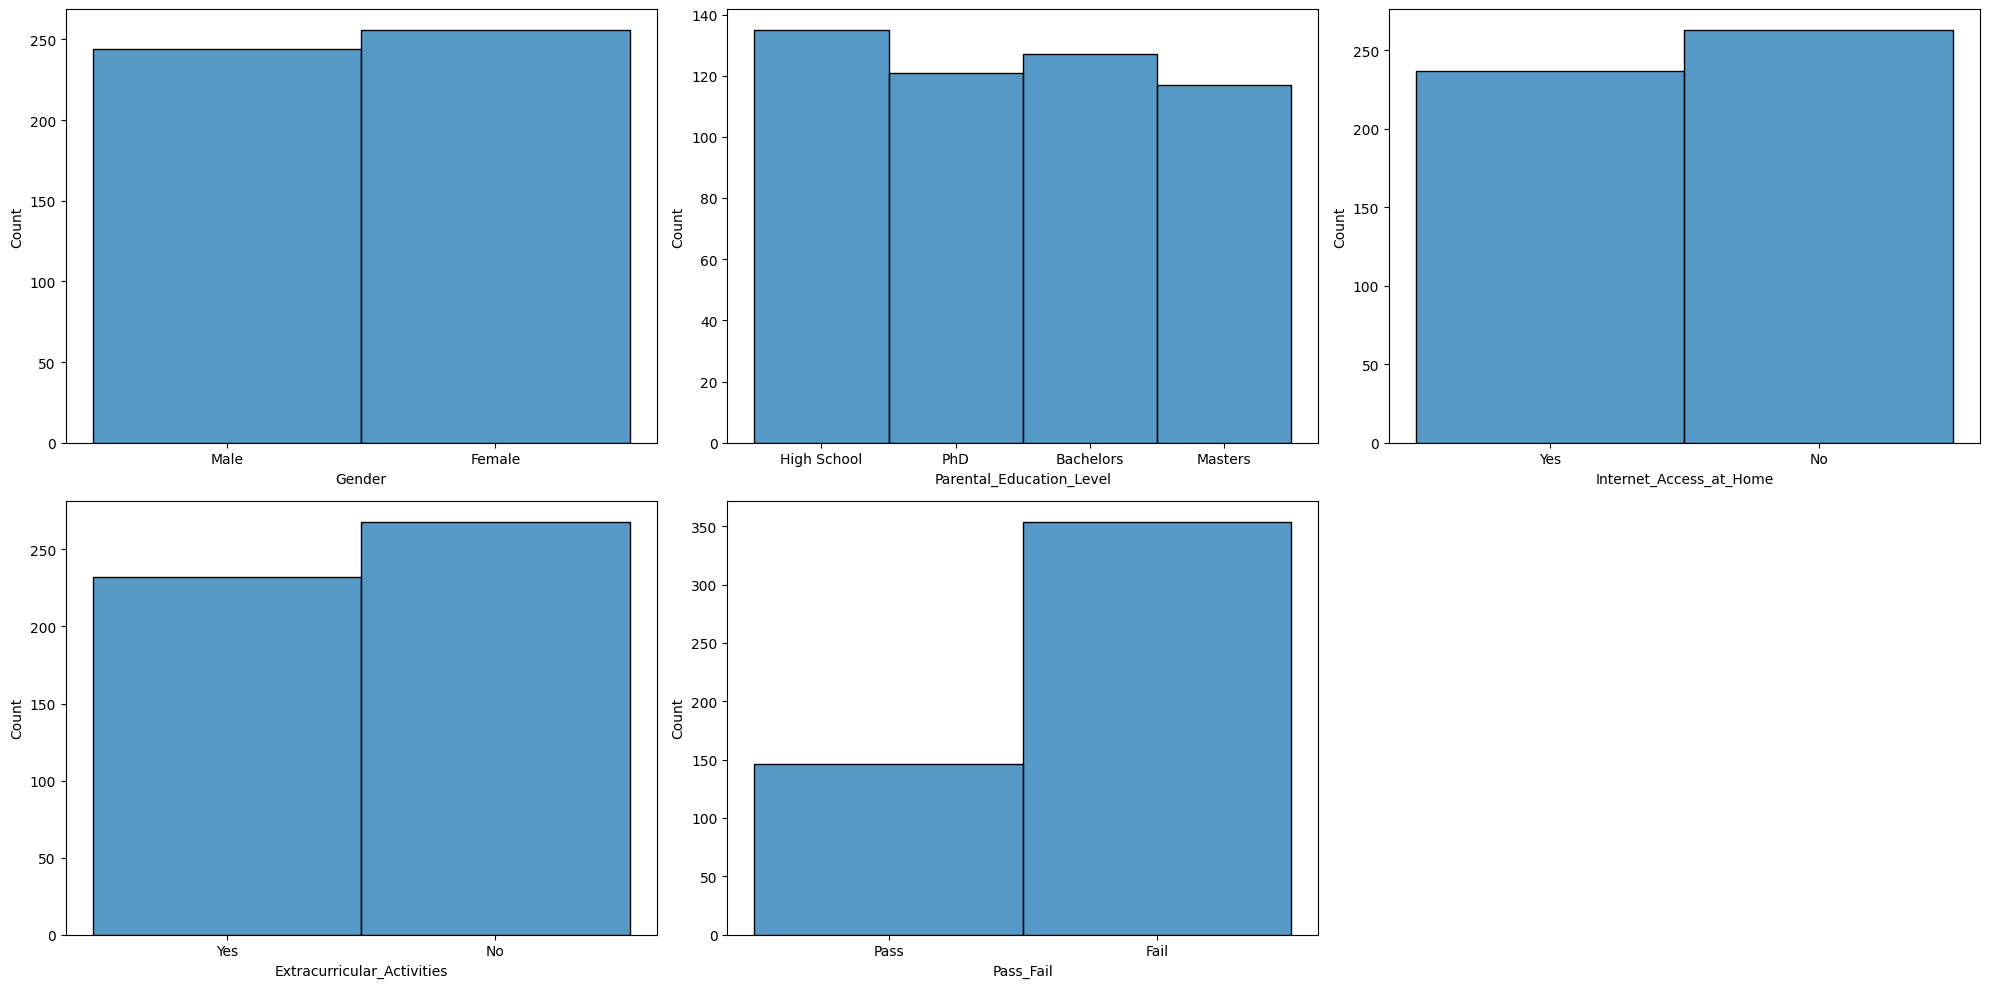

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(x=col, data=df, palette='viridis')
    
plt.tight_layout()
plt.show()

In [18]:
numerical_cols = df.select_dtypes('int64', 'float64')
numerical_cols

,Study_Hours_per_Week,Past_Exam_Scores,Final_Exam_Score
0,31,86,63
1,16,73,50
2,21,74,55
3,27,99,65
4,37,63,70
...,...,...,...
701,21,90,50
702,22,76,60
703,14,78,50
705,25,75,57


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\2255665073.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\2255665073.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\2255665073.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, palette='viridis')


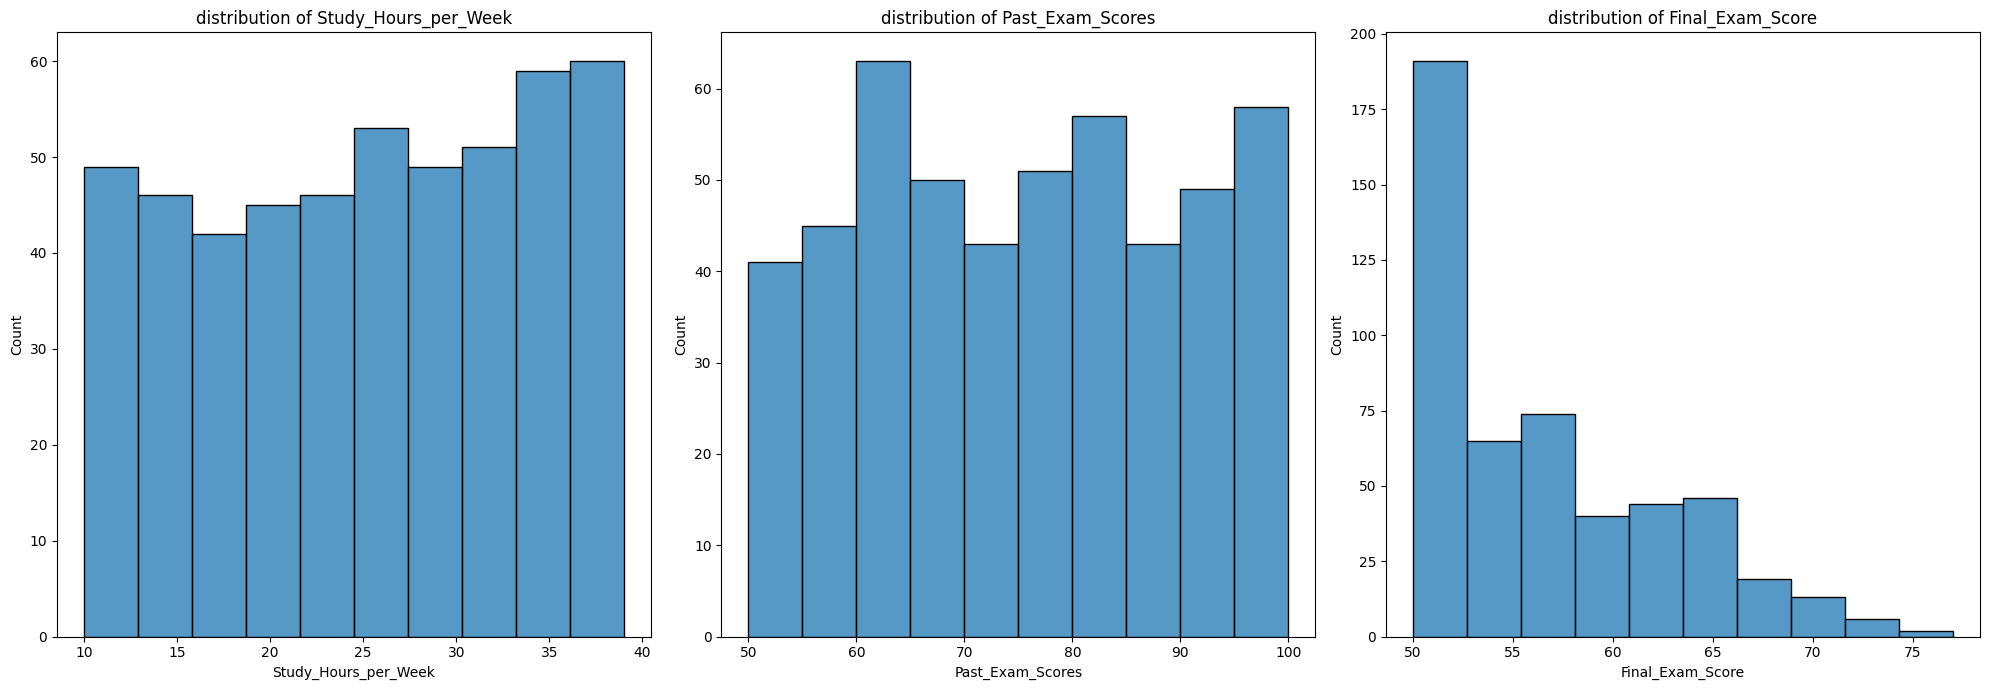

In [19]:
plt.rcParams['figure.figsize'] = (20, 7)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=col, data=df, palette='viridis')
    plt.title(f'distribution of {col}')
    
    
plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

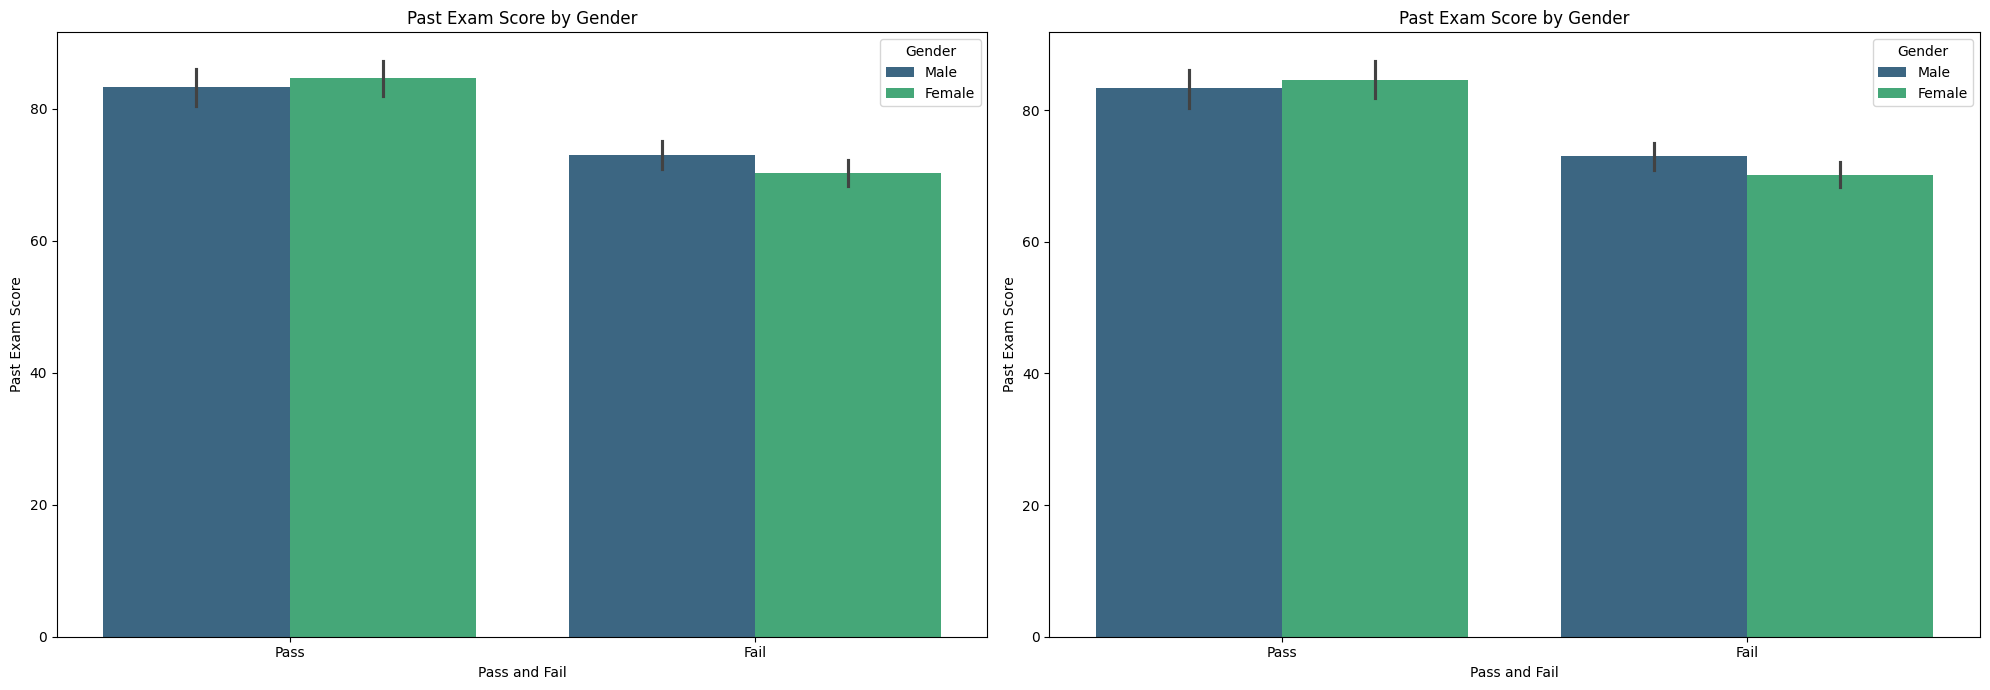

In [21]:
plt.rcParams['figure.figsize'] = (20, 7)

plt.subplot(1, 2, 1)
sns.barplot(x='Pass_Fail', y='Past_Exam_Scores', hue='Gender', data=df, palette='viridis')
plt.title('Past Exam Score by Gender')
plt.ylabel('Past Exam Score')
plt.xlabel('Pass and Fail')

plt.subplot(1, 2, 2)
sns.barplot(x='Pass_Fail', y='Past_Exam_Scores', hue='Gender', data=df, palette='viridis')
plt.title('Past Exam Score by Gender')
plt.ylabel('Past Exam Score')
plt.xlabel('Pass and Fail')

plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

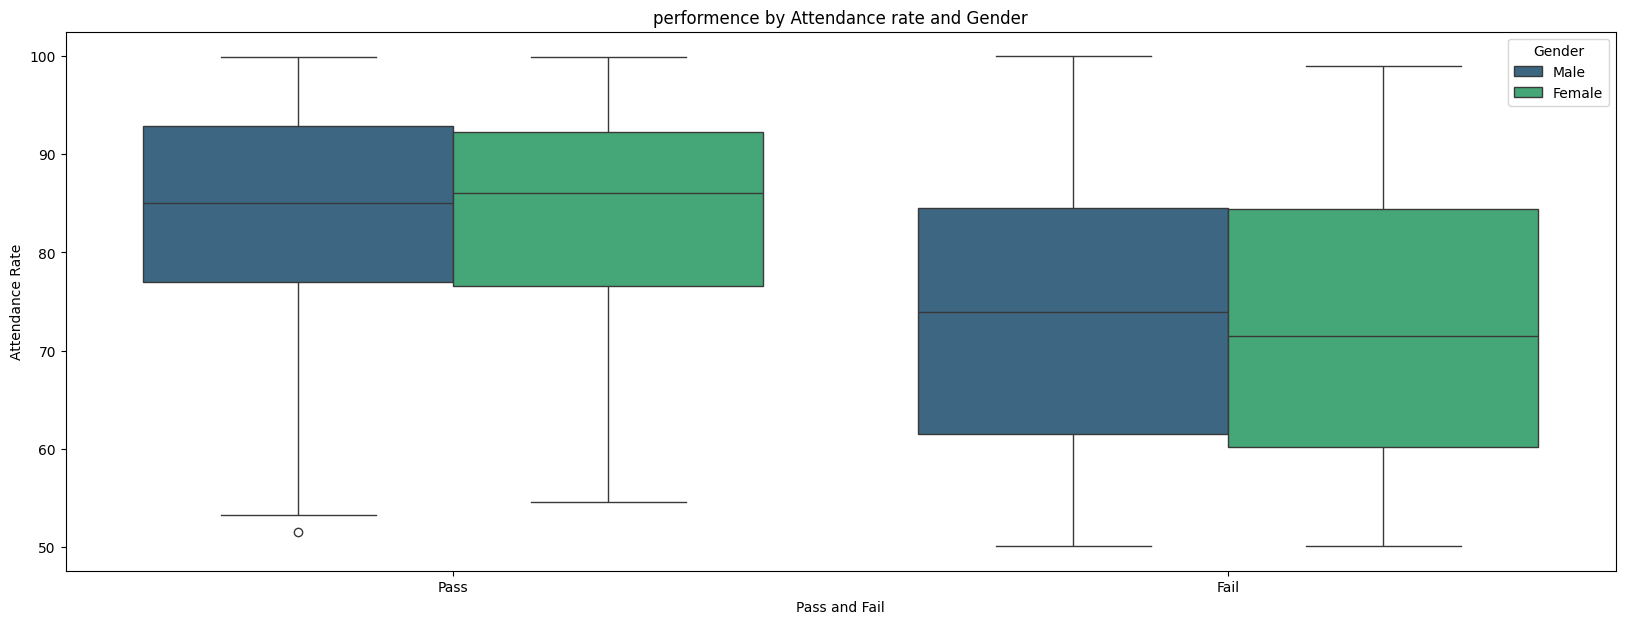

In [23]:
sns.boxplot(x='Pass_Fail', y='Attendance_Rate', hue='Gender', data=df, palette='viridis')
plt.title('performence by Attendance rate and Gender')
plt.ylabel('Attendance Rate')
plt.xlabel('Pass and Fail')
plt.show()

In [24]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\1964420578.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Past_Exam_Scores', y='Attendance_Rate', data=df, palette='viridis')


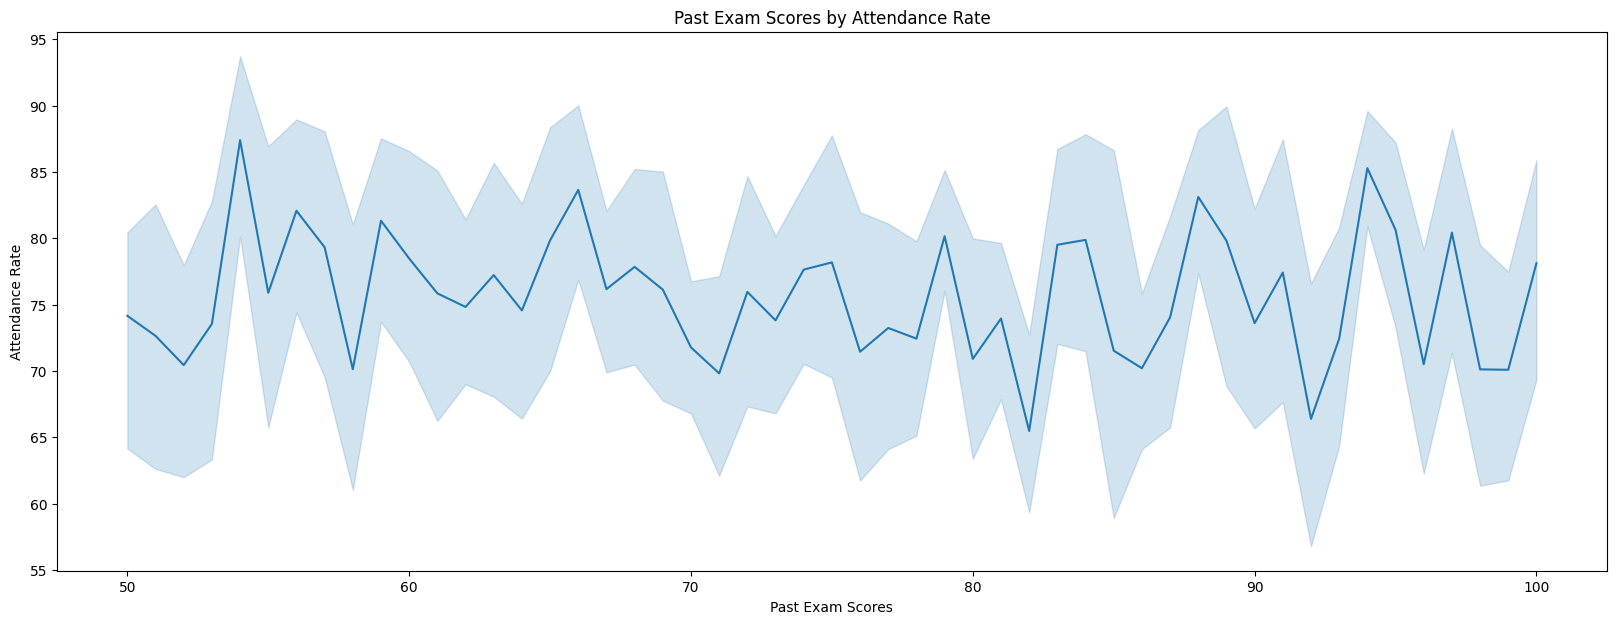

In [25]:
sns.lineplot(x='Past_Exam_Scores', y='Attendance_Rate', data=df, palette='viridis')
plt.title('Past Exam Scores by Attendance Rate')
plt.ylabel('Attendance Rate')
plt.xlabel('Past Exam Scores')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\2077072586.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Final_Exam_Score', y='Attendance_Rate', data=df, palette='viridis')


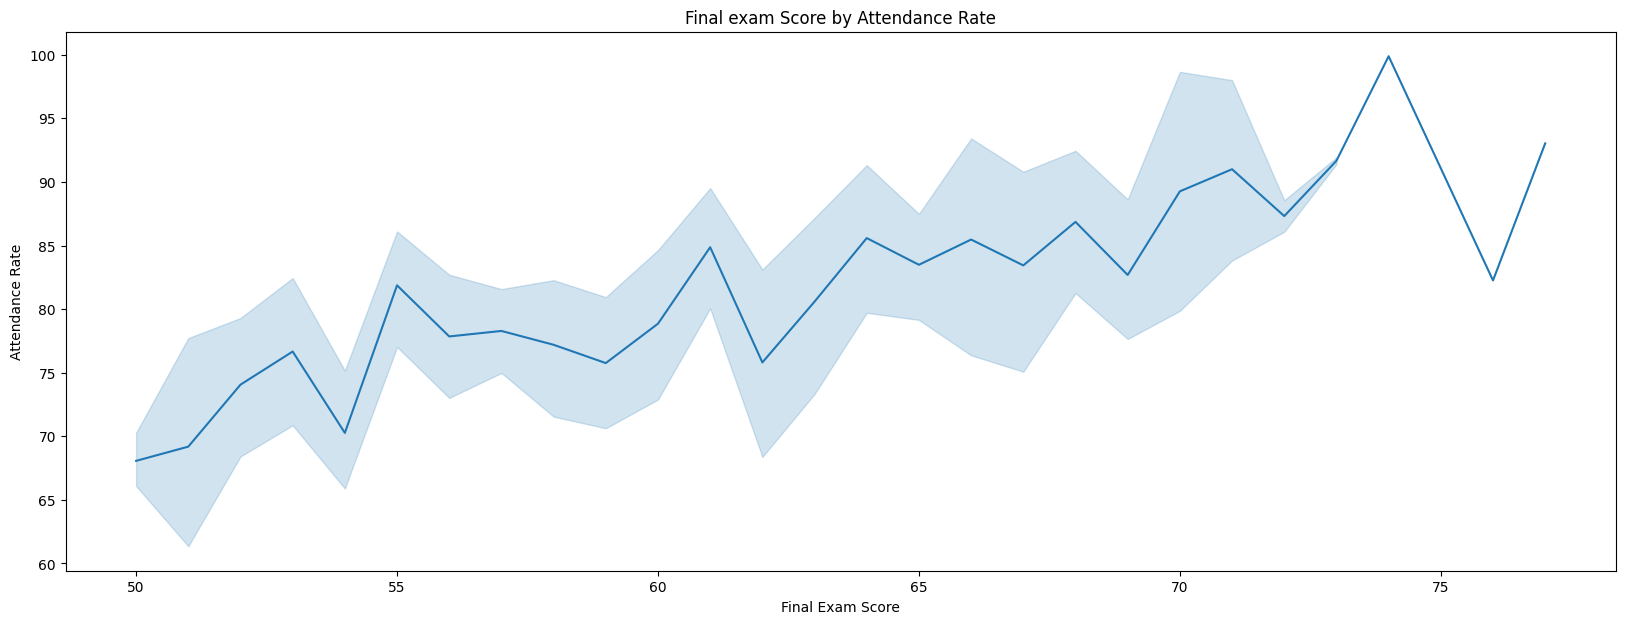

In [26]:
sns.lineplot(x='Final_Exam_Score', y='Attendance_Rate', data=df, palette='viridis')
plt.title('Final exam Score by Attendance Rate')
plt.ylabel('Attendance Rate')
plt.xlabel('Final Exam Score')
plt.show()

In [27]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\150602313.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Education_Level', y='Final_Exam_Score', data=df, palette='viridis')


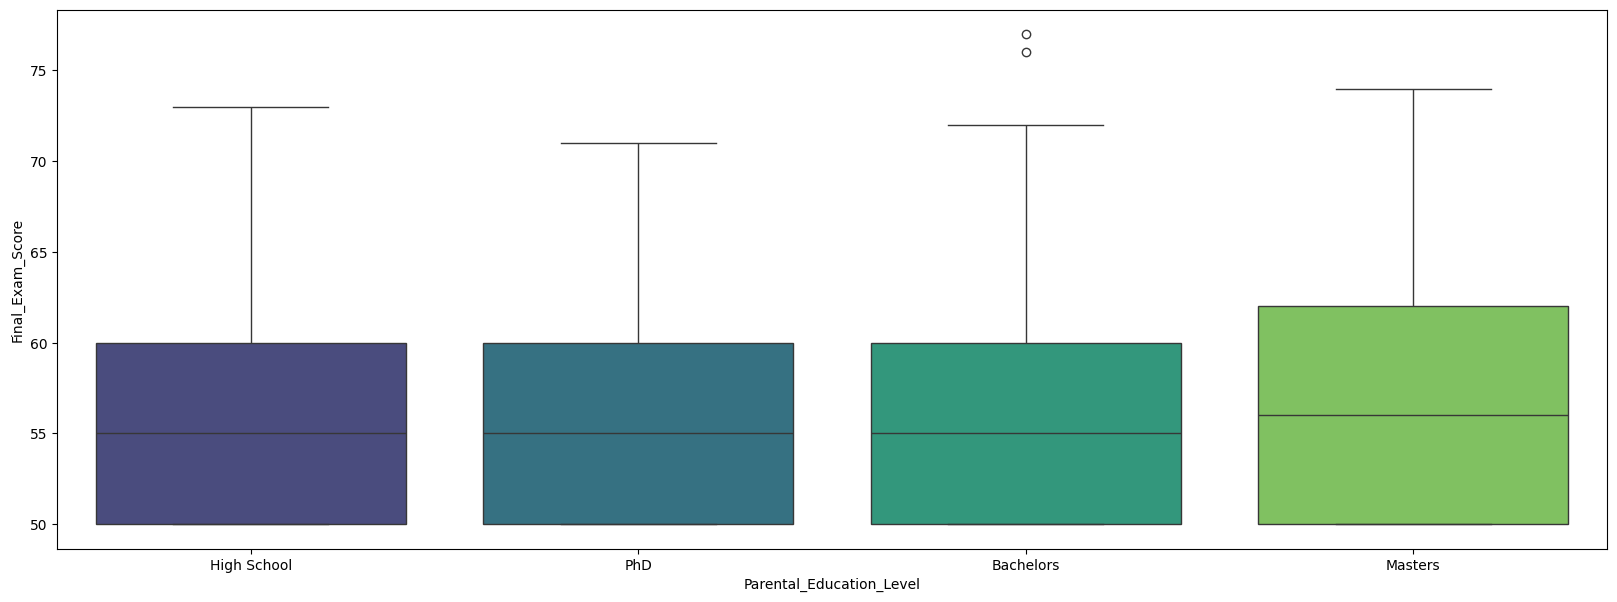

In [28]:
sns.boxplot(x='Parental_Education_Level', y='Final_Exam_Score', data=df, palette='viridis')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4660\3587596665.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Internet_Access_at_Home', y='Final_Exam_Score', data=df, palette='viridis')


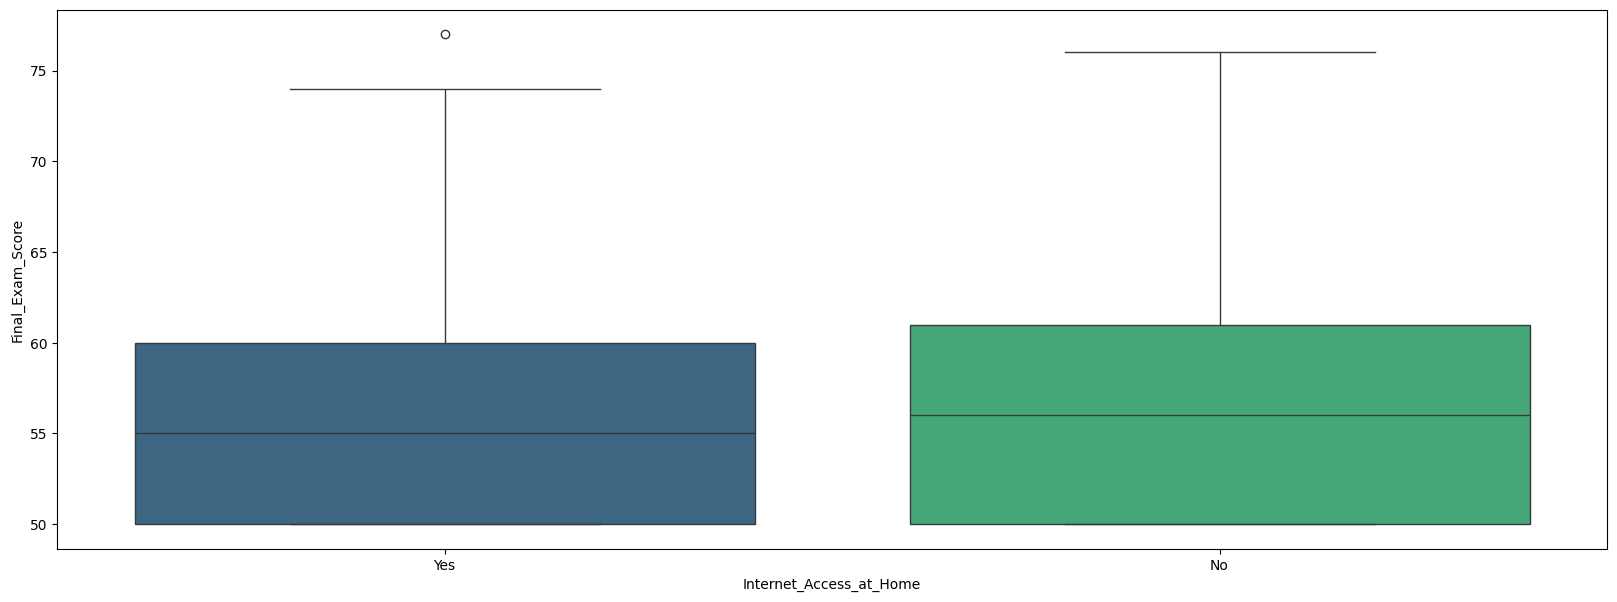

In [30]:
sns.boxplot(x='Internet_Access_at_Home', y='Final_Exam_Score', data=df, palette='viridis')
plt.show()

In [36]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,500.000000,500.000000,500.000000,500.000000
mean,25.184000,75.830689,75.218000,56.378000
std,8.804384,13.969186,14.442841,6.266551
min,10.000000,50.116970,50.000000,50.000000
25%,18.000000,64.959340,62.000000,50.000000
50%,26.000000,76.752661,75.500000,55.000000
75%,33.000000,87.548861,88.000000,61.000000
max,39.000000,99.967675,100.000000,77.000000


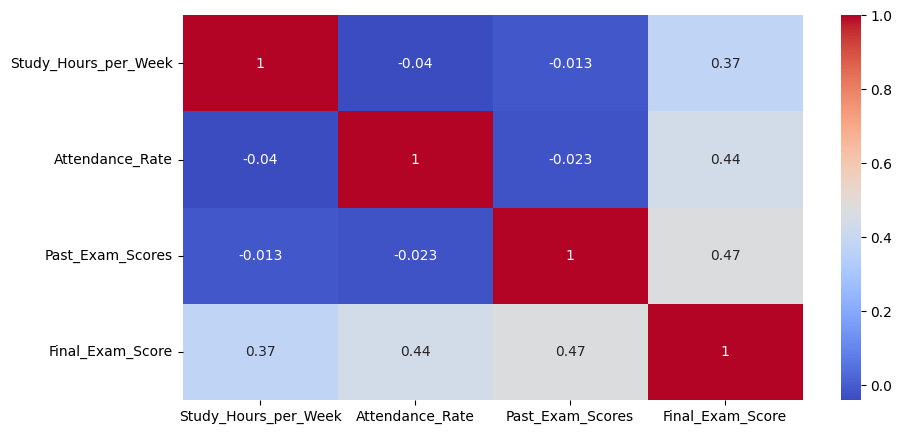

In [34]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.rcParams['figure.figsize'] = (5, 5)

Regression and final exam score prediction

In [35]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

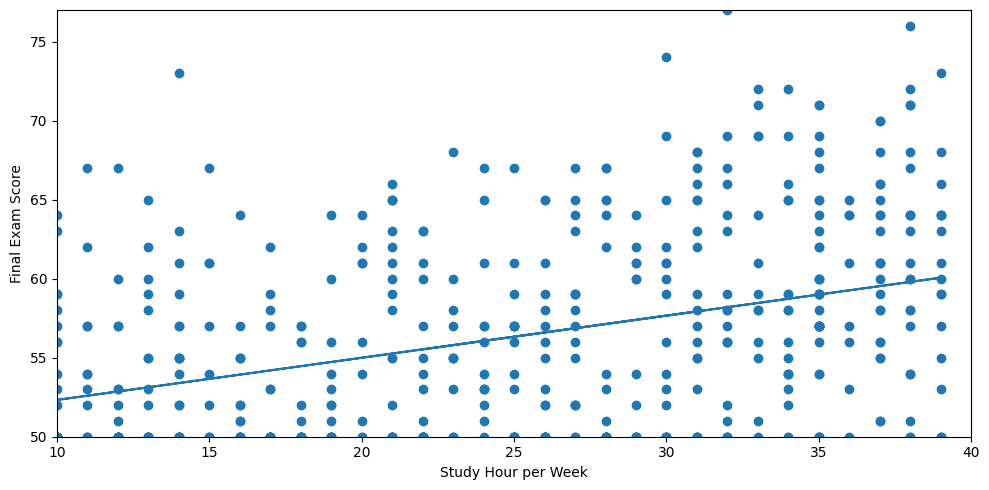

In [ ]:
x =df['Study_Hours_per_Week']
y =df['Final_Exam_Score']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.rcParams['figure.figsize'] = (10, 5)
plt.ylim(ymin=50, ymax=77)
plt.xlim(xmin=10, xmax=40)
plt.ylabel('Final Exam Score')
plt.xlabel('Study Hour per Week')

plt.tight_layout()
plt.show()

In [48]:
model = smf.ols('Final_Exam_Score ~ Study_Hours_per_Week', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     81.34
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           4.10e-18
Time:                        05:27:34   Log-Likelihood:                -1588.8
No. Observations:                 500   AIC:                             3182.
Df Residuals:                     498   BIC:                             3190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               49.6614 

In [50]:
def perdict_Score(Study_Hours_per_Week):
    return(0.2667 * Study_Hours_per_Week + 49.6614)
print(perdict_Score(39))
print(perdict_Score(33))
print(perdict_Score(26))
print(perdict_Score(18))
print(perdict_Score(10))

60.0627
58.4625
56.5956
54.462
52.3284


In [51]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

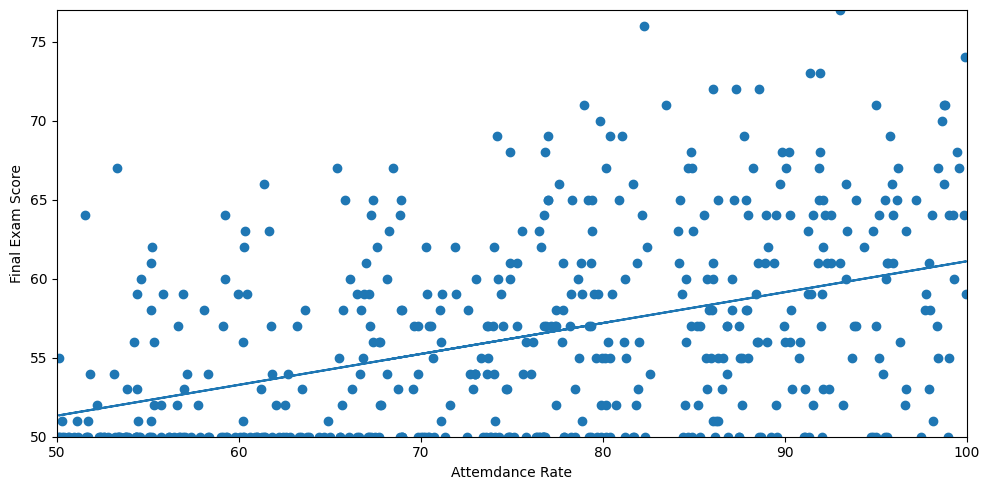

In [54]:
x =df['Attendance_Rate']
y = df['Final_Exam_Score']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=50, ymax=77)
plt.xlim(xmin=50, xmax=100)
plt.ylabel('Final Exam Score')
plt.xlabel('Attemdance Rate')

plt.tight_layout()
plt.show()

In [55]:
model = smf.ols('Final_Exam_Score ~ Attendance_Rate', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           1.39e-24
Time:                        06:47:16   Log-Likelihood:                -1573.9
No. Observations:                 500   AIC:                             3152.
Df Residuals:                     498   BIC:                             3160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          41.5561      1.395     

In [56]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,500.000000,500.000000,500.000000,500.000000
mean,25.184000,75.830689,75.218000,56.378000
std,8.804384,13.969186,14.442841,6.266551
min,10.000000,50.116970,50.000000,50.000000
25%,18.000000,64.959340,62.000000,50.000000
50%,26.000000,76.752661,75.500000,55.000000
75%,33.000000,87.548861,88.000000,61.000000
max,39.000000,99.967675,100.000000,77.000000


In [57]:
def perdict_Score(Attendance_Rate):
    return(0.1955 * Attendance_Rate + 41.5561)
print(perdict_Score(50.116970))
print(perdict_Score(64.959340))
print(perdict_Score(76.752661))
print(perdict_Score(87.548861))
print(perdict_Score(99.967675))

51.353967635000004
54.255650970000005
56.5612452255
58.6719023255
61.0997804625


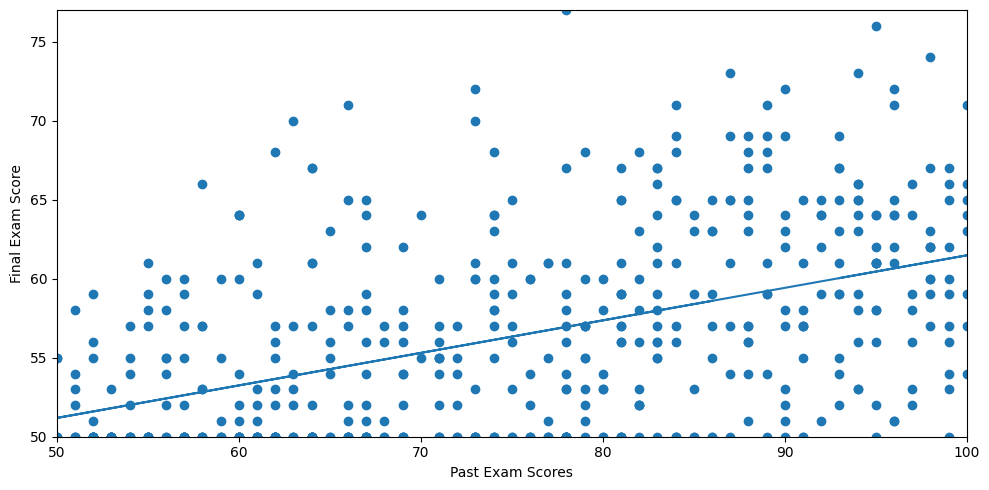

In [58]:
x = df['Past_Exam_Scores']
y = df['Final_Exam_Score']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=50, ymax=77)
plt.xlim(xmin=50, xmax=100)
plt.ylabel('Final Exam Score')
plt.xlabel('Past Exam Scores')


plt.tight_layout()
plt.show()

In [61]:
model = smf.ols('Final_Exam_Score ~ Past_Exam_Scores', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Final_Exam_Score   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           2.10e-29
Time:                        07:24:21   Log-Likelihood:                -1562.9
No. Observations:                 500   AIC:                             3130.
Df Residuals:                     498   BIC:                             3138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           40.9001      1.311  

In [62]:
def perdict_Score(Past_Exam_Scores):
    return(0.2058 * Past_Exam_Scores + 40.9001)
print(perdict_Score(50))
print(perdict_Score(62))
print(perdict_Score(75.5))
print(perdict_Score(88))
print(perdict_Score(100))

51.1901
53.6597
56.438
59.01050000000001
61.48010000000001
